In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
from collections import Counter

In [3]:
file_path = Path.cwd() / "datasets" / "testdata.csv"
df = pd.read_csv(file_path)
df.head(5)

,Index,Day,Time,Probability,Boosted Probability,Boosted People,Special Notes,Michael,Jacob,Gavin,...,Kurumi,Ethan,Chloe,Aidan,Justin,Lilly,Mudkip,Will,James,Denzel
0,0,Oct 1,0,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,1,Oct 1,20,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,0.0,0.0,NaN,...,NaN,0.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,2,Oct 2,0,"{0:0.75, 1:0.25}",NaN,NaN,mrs. johnson,0.0,0.0,1.0,...,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
3,3,Oct 2,-1,"{0:0.75, 6:0.25}",NaN,NaN,horse derby,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,NaN
4,4,Oct 2,20,"{0:0.5, 1:0.35, 2:0.1, 3:0.04, 10:0.01}",NaN,NaN,mr. kim,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN


# Cleaning

In [4]:
players = ['Michael', 'Jacob', 'Gavin', 'Lawrence', 'Nathan',
    'Gabby', 'Raymond', 'Chris', 'Kurumi', 'Ethan', 'Chloe', 'Aidan',
    'Justin', 'Lilly', 'Mudkip', 'Will', 'James', 'Denzel']

In [5]:
colors = [
    "#800000", "#9A6324", "#808000", "#469990", "#000075", '#000000', '#e6194B', '#f58231',
    "#bfef45", '#3cb44b', "#42d4f4", "#4363d8", "#911eb4", '#f032e6', '#a9a9a9', '#fabed4',
    '#ffd8b1', '#aaffc3', '#dcbeff'
]

In [6]:
def str_to_dict(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x.strip())
        except (ValueError, SyntaxError):
            return x
    return x

In [7]:
df.replace(['NaN', 'None', 'null', ''], np.nan, inplace=True)
df = df.drop('Index', axis=1)
df['Probability'] = df['Probability'].apply(str_to_dict)
df['Boosted Probability'] = df['Boosted Probability'].apply(str_to_dict)
df[players] = df[players].astype(float)
df.head(5)

,Day,Time,Probability,Boosted Probability,Boosted People,Special Notes,Michael,Jacob,Gavin,Lawrence,...,Kurumi,Ethan,Chloe,Aidan,Justin,Lilly,Mudkip,Will,James,Denzel
0,Oct 1,0,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,Oct 1,20,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,Oct 2,0,"{0: 0.75, 1: 0.25}",NaN,NaN,mrs. johnson,0.0,0.0,1.0,NaN,...,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
3,Oct 2,-1,"{0: 0.75, 6: 0.25}",NaN,NaN,horse derby,0.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,NaN
4,Oct 2,20,"{0: 0.5, 1: 0.35, 2: 0.1, 3: 0.04, 10: 0.01}",NaN,NaN,mr. kim,0.0,0.0,0.0,NaN,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN


# Line Plot

In [8]:
df_lineplot = df[['Day', 'Time'] + players]
df_lineplot[players] = df_lineplot[players].fillna(method='ffill')
for p in players:
    df_lineplot[p] = df_lineplot[p].cumsum()
df_lineplot.head(5)

C:\Users\micha\AppData\Local\Temp\ipykernel_13148\1159967554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lineplot[players] = df_lineplot[players].fillna(method='ffill')
C:\Users\micha\AppData\Local\Temp\ipykernel_13148\1159967554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lineplot[p] = df_lineplot[p].cumsum()


,Day,Time,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,Raymond,Chris,Kurumi,Ethan,Chloe,Aidan,Justin,Lilly,Mudkip,Will,James,Denzel
0,Oct 1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,Oct 1,20,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,NaN
2,Oct 2,0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,NaN
3,Oct 2,-1,1.0,1.0,1.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,2.0,1.0,8.0,0.0,NaN
4,Oct 2,20,1.0,1.0,1.0,1.0,2.0,8.0,0.0,0.0,2.0,2.0,1.0,2.0,8.0,2.0,2.0,14.0,0.0,NaN


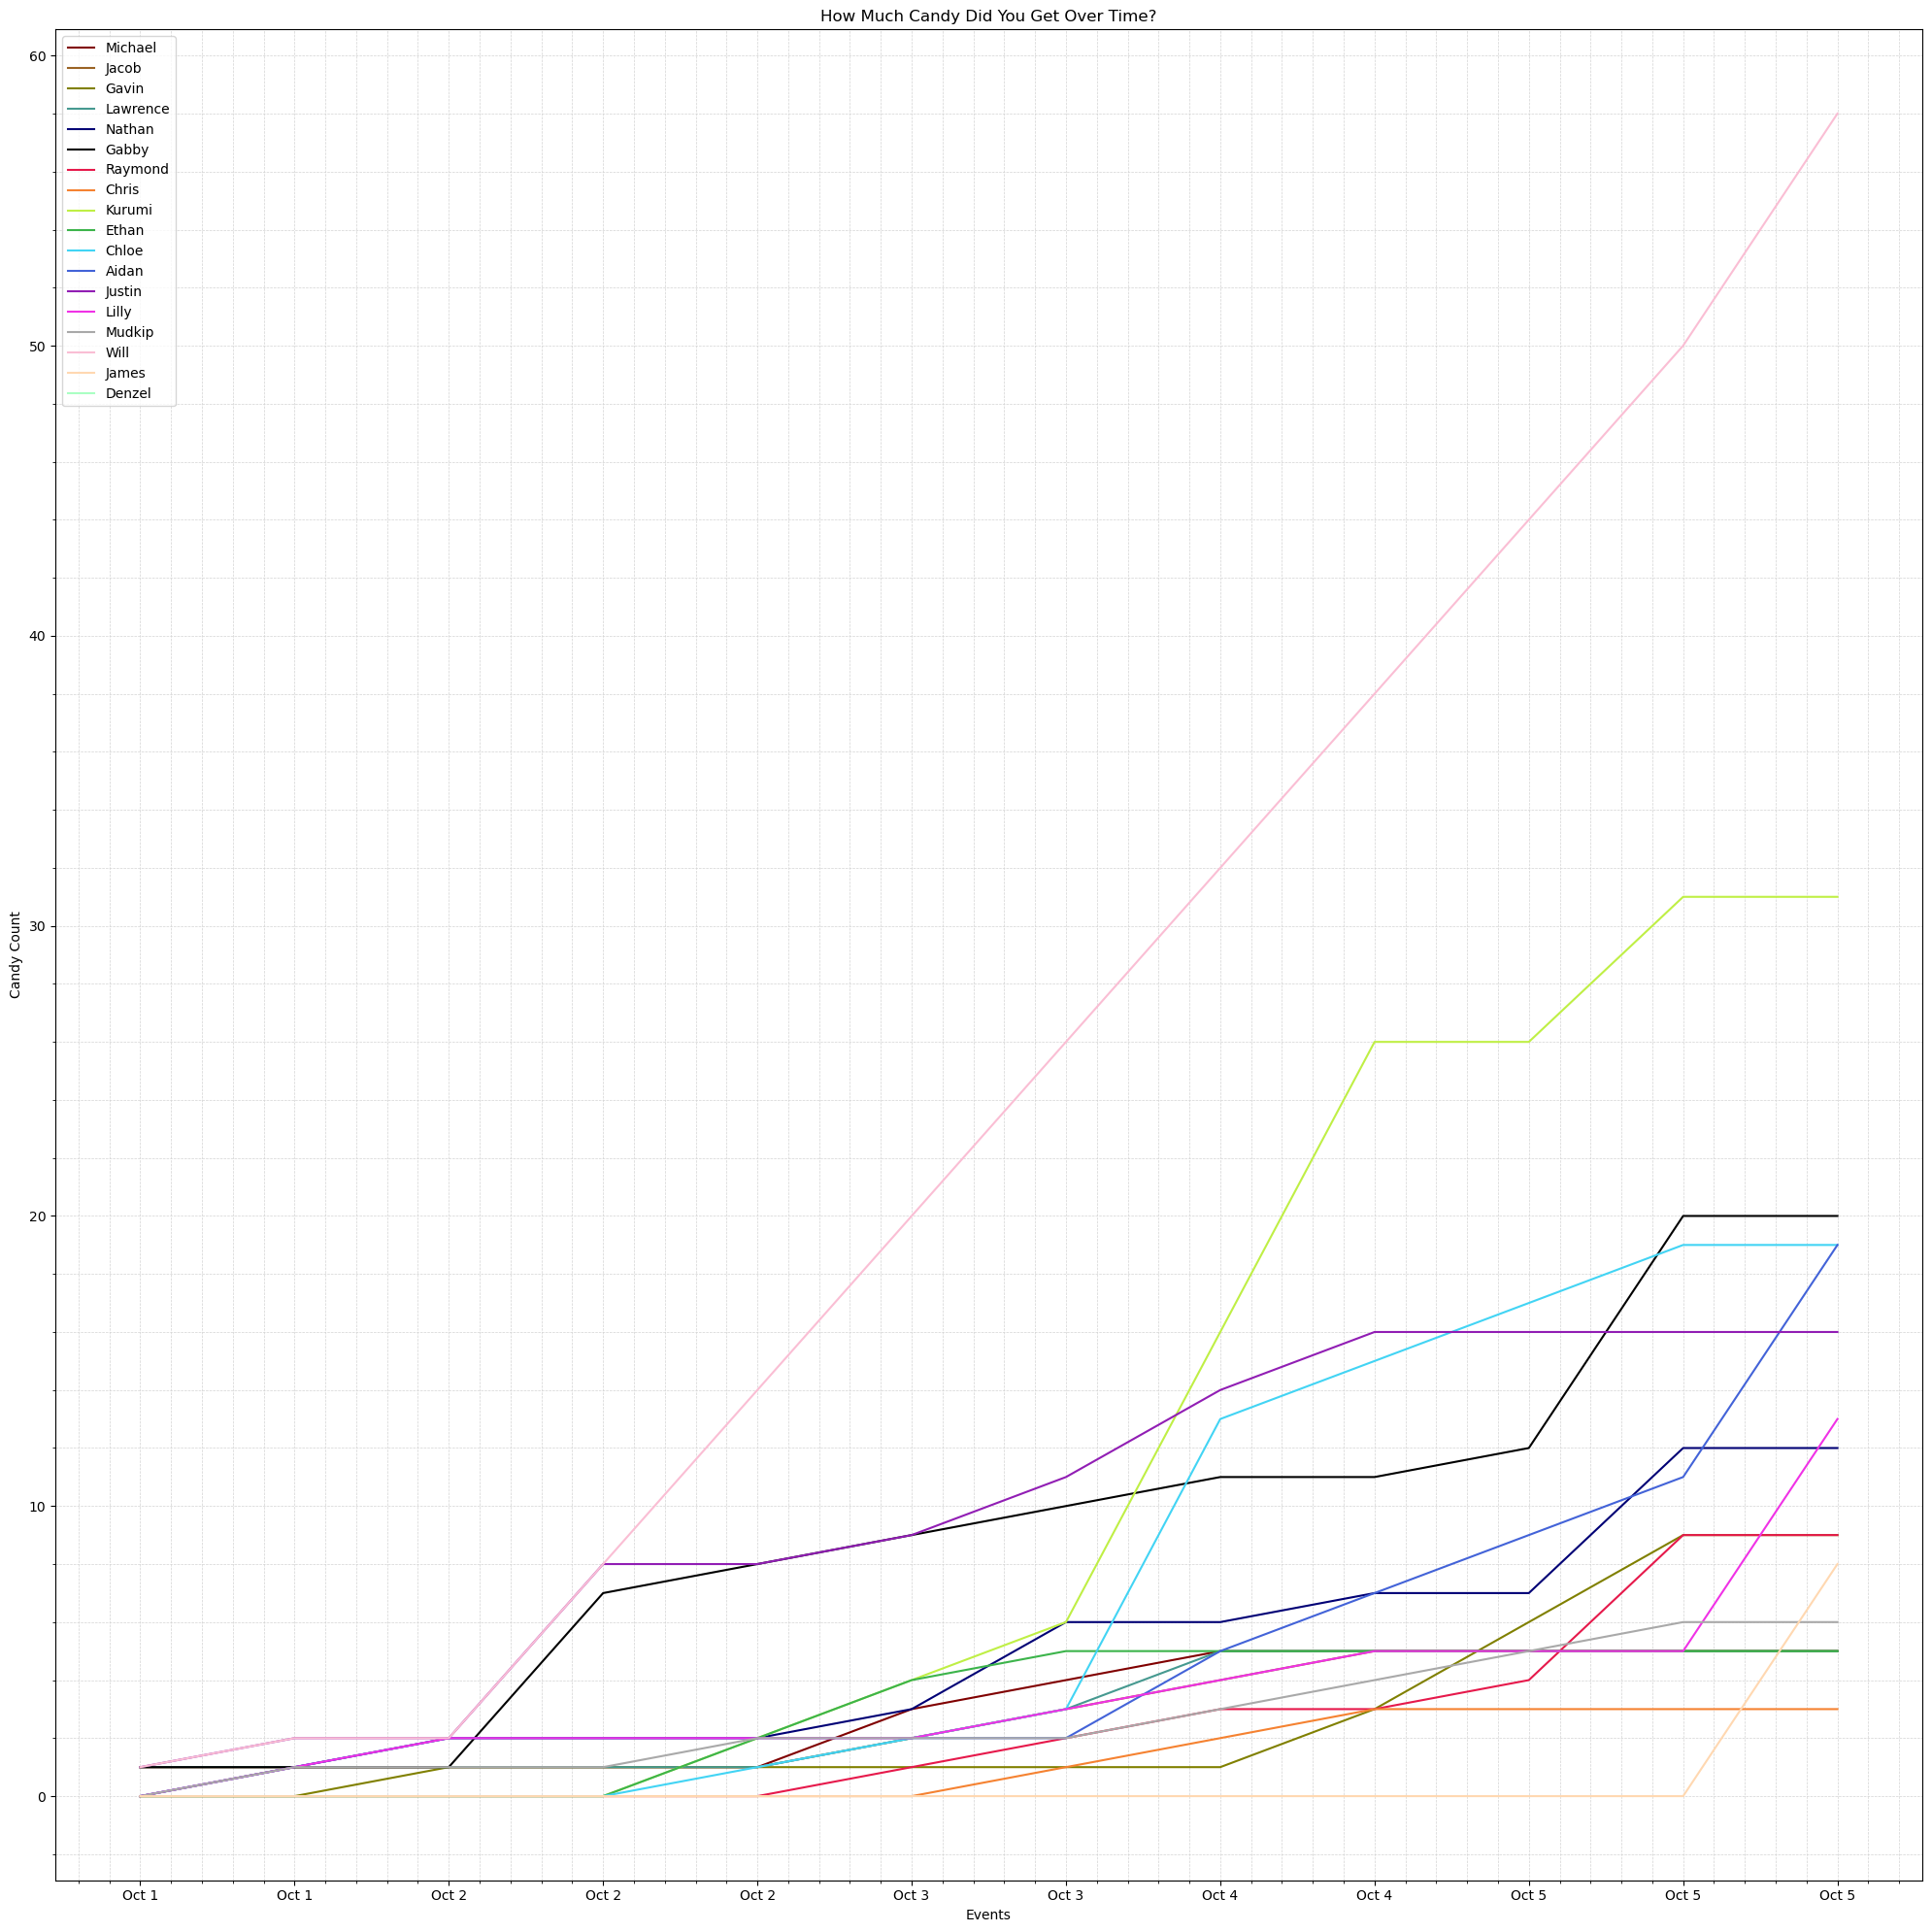

In [9]:
plt.figure(figsize=(20, 20))

for i, p in enumerate(players):
    plt.plot(df_lineplot.index, df_lineplot[p], label=p, color=colors[i])

plt.title('How Much Candy Did You Get Over Time?')
plt.xlabel('Events')
plt.ylabel('Candy Count')
plt.xticks(df_lineplot.index, df_lineplot['Day'])
plt.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()

plt.tight_layout()
plt.show()

# CANDY KDE PLOT

In [10]:
def z_score(num, prob_dist):
    expected = sum(val * prob for val, prob in prob_dist.items())
    var = sum(prob * (val - expected)**2 for val, prob in prob_dist.items())
    std_dev = np.sqrt(var)
    return (num - expected) / std_dev

In [11]:
def z_score_array(prob_arr, boostedprob_arr, boostedppl_arr, values_arr, name):
    vector = []
    for i in range(len(values_arr)):
        if np.isnan(values_arr[i]):
            continue
        if not np.isnan(boostedppl_arr[i]) and name in boostedppl_arr[i]:
            prob_dist = boostedprob_arr[i]
        else:
            prob_dist = prob_arr[i]
        z = z_score(values_arr[i], prob_dist)
        vector.append(z)
    return vector

In [12]:
df_densityplot = df[['Probability', 'Boosted Probability', 'Boosted People'] + players]
df_densityplot.head(5)

,Probability,Boosted Probability,Boosted People,Michael,Jacob,Gavin,Lawrence,Nathan,Gabby,Raymond,...,Kurumi,Ethan,Chloe,Aidan,Justin,Lilly,Mudkip,Will,James,Denzel
0,"{0: 0.75, 1: 0.25}",NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
1,"{0: 0.75, 1: 0.25}",NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,...,NaN,0.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,"{0: 0.75, 1: 0.25}",NaN,NaN,0.0,0.0,1.0,NaN,1.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN
3,"{0: 0.75, 6: 0.25}",NaN,NaN,0.0,0.0,0.0,NaN,0.0,6.0,0.0,...,NaN,0.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,NaN
4,"{0: 0.5, 1: 0.35, 2: 0.1, 3: 0.04, 10: 0.01}",NaN,NaN,0.0,0.0,0.0,NaN,0.0,1.0,0.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN


In [13]:
z_score_dict = {}
for name in players:
    z_score_dict[name] = np.mean(z_score_array(df_densityplot['Probability'], df_densityplot['Boosted Probability'], df_densityplot['Boosted People'], df_densityplot[name], name))

for key, val in z_score_dict.items():
    print(key, val)


Michael -0.09824700812755062
Jacob -0.050336682021343095
Gavin 0.10374047369990057
Lawrence 0.08739157055031904
Nathan 0.11698964272091524
Gabby 0.18549538258430334
Raymond -0.3355673674126835
Chris -0.38200001220433993
Kurumi 1.0106229014758825
Ethan -0.23438510891594372
Chloe 0.9210289978535934
Aidan 0.6419090815586177
Justin 0.5053562128889786
Lilly 0.33513522114541283
Mudkip -0.045556797397669914
Will 1.1547005383792515
James -0.3473050641257543
Denzel nan


c:\Users\micha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\micha\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


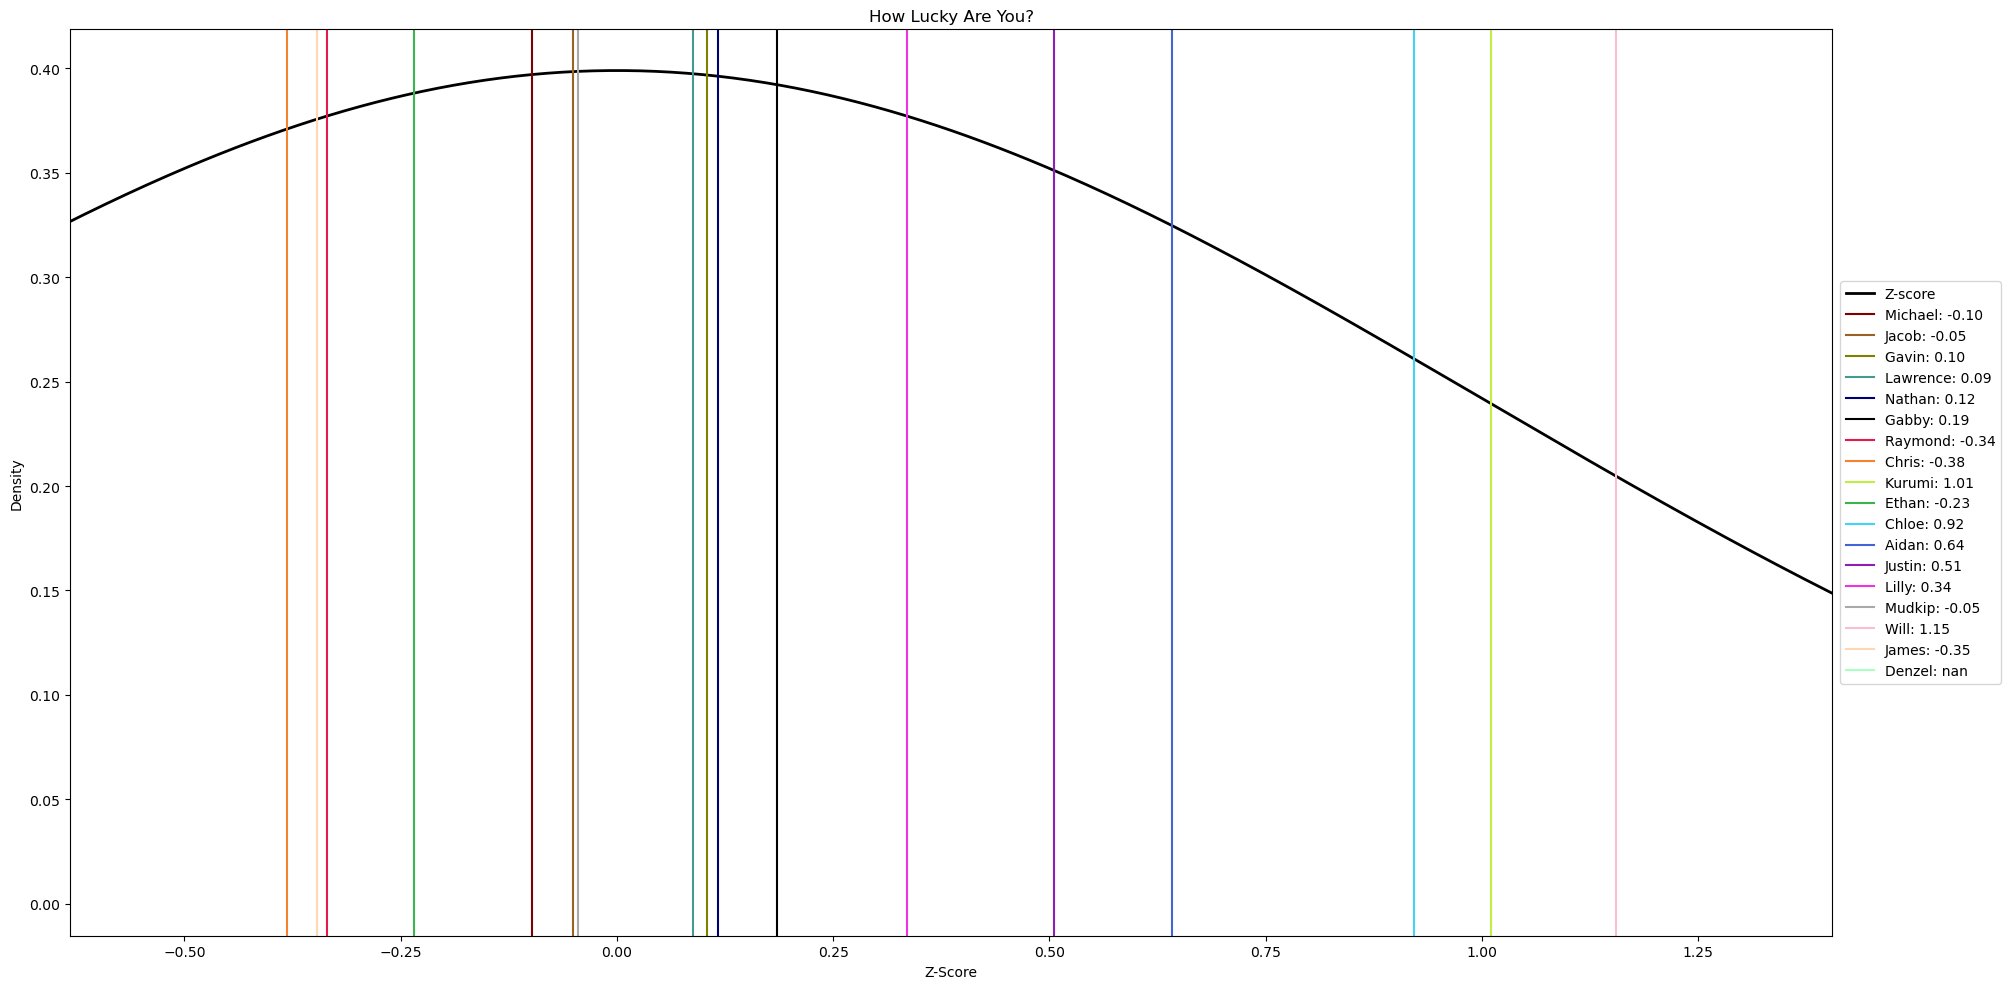

In [14]:
z_scores_agg = np.array(list(z_score_dict.values()))
z_scores_agg_no_nan = z_scores_agg[~np.isnan(z_scores_agg)]

x = np.linspace(-3, 3, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

plt.figure(figsize=(20, 10))
plt.plot(x, y, label="Z-score", color='black', lw=2)

for i, (name, z_score) in enumerate(z_score_dict.items()):
    plt.axvline(z_score, color=colors[i], linestyle='-', label=f'{name}: {z_score:.2f}')

plt.xlim(z_scores_agg_no_nan.min() - 0.25, z_scores_agg_no_nan.max() + 0.25)
plt.title('How Lucky Are You?')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

18  18


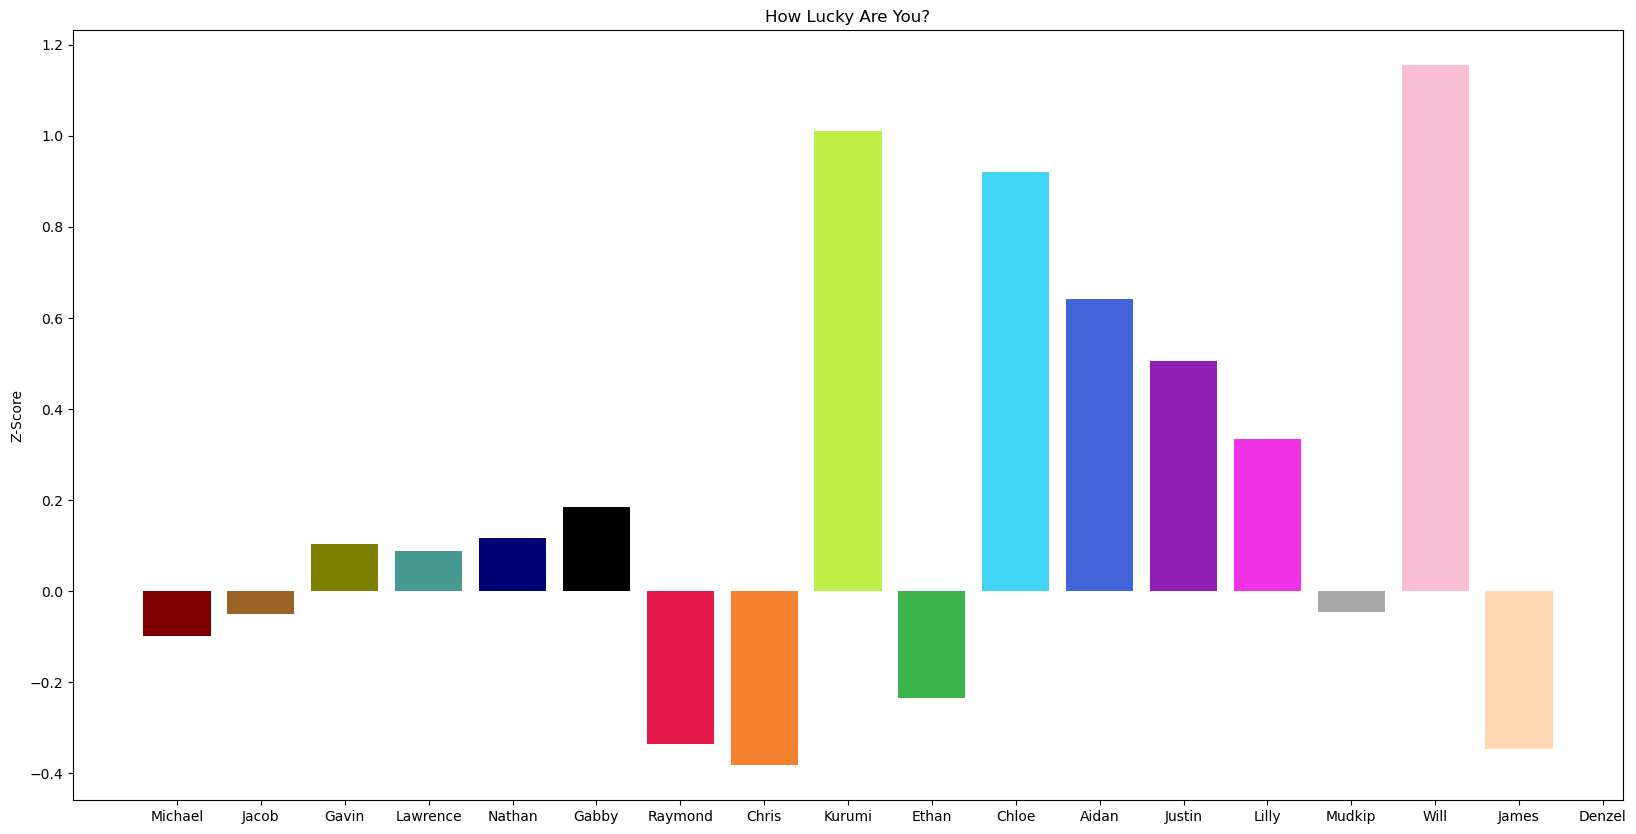

In [15]:
#----Z Score Bar Plot----
z_scores_agg = np.array(list(z_score_dict.values())) # raw values
#set up figure size
plt.figure(figsize=(20, 10))
# create bar chart 
print(f"{len(players)}  {len(z_scores_agg)}")
plt.bar(players, z_scores_agg, color = colors)

# graph cosmetics
plt.ylabel("Z-Score")
plt.title("How Lucky Are You?")
plt.tight_layout
plt.show()

# CANDY CHECKLIST KDE PLOT

In [16]:
def simulate_checklist_event(n=100000):
    candies = {
        "Starburst": 0.5/5, "Festive Pencil": 0.5/5, "Dum Dum": 0.5/5, "Dots": 0.5/5, "Fun Dip": 0.5/5,
        "Butterfinger": 0.31/3, "100 Grand": 0.31/3, "Sour Patch Kids": 0.31/3,
        "Krabby Patty": 0.178/2, "Crunch": 0.178/2, "KitKat": 0.01, "Fent-Laced Ring Pop": 0.002
    }

    checklist = [
        'Starburst', 'Festive Pencil', 'Dum Dum', 'Dots', 'Fun Dip',
        'Butterfinger', '100 Grand', 'Sour Patch Kids',
        'Krabby Patty', 'Crunch'
    ]

    candy_names = list(candies.keys())
    prob_dist = list(candies.values())

    vector = np.zeros(n)

    for i in range(n):
        collection = {c:0 for c in candy_names}
        open_loot = 0

        while True:
            c = np.random.choice(candy_names, p=prob_dist)

            if c == "Fent-Laced Ring Pop":
                collection = {c:0 for c in candy_names}
                continue
            elif c == "KitKat":
                open_loot += 1
                break

            if collection[c] < 3:
                collection[c] += 1
                open_loot += 1
            else:
                continue

            if all(collection[x] >= 1 for x in checklist):
                break

        vector[i] = open_loot

    return np.mean(vector), np.std(vector)

expected, std = simulate_checklist_event()
print(f"Expected draws: {expected:.2f}, Std: {std:.2f}")

Expected draws: 20.09, Std: 7.03
